In [1]:
# Imported Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

## Load and Read Dataset

In [2]:
!gdown --id 1lbqX5T7LvKRe0xpes0Ow3Mh9tiBtmC8H

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1lbqX5T7LvKRe0xpes0Ow3Mh9tiBtmC8H
To: /content/Fraud_Detection.zip
100% 118M/118M [00:03<00:00, 29.8MB/s]


In [3]:
!unzip Fraud_Detection.zip

Archive:  Fraud_Detection.zip
  inflating: application_data.csv    
  inflating: columns_description.csv  
  inflating: previous_application.csv  


In [4]:
df = pd.read_csv('application_data.csv')

## Dataset Description and Preparation

In [ ]:
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(307511, 122)

In [ ]:
for types in df.dtypes.unique():
    print(types)
    print(df.select_dtypes(types).columns)

int64
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')
object
Index(['NAME_CONTRACT_TYPE', 'COD

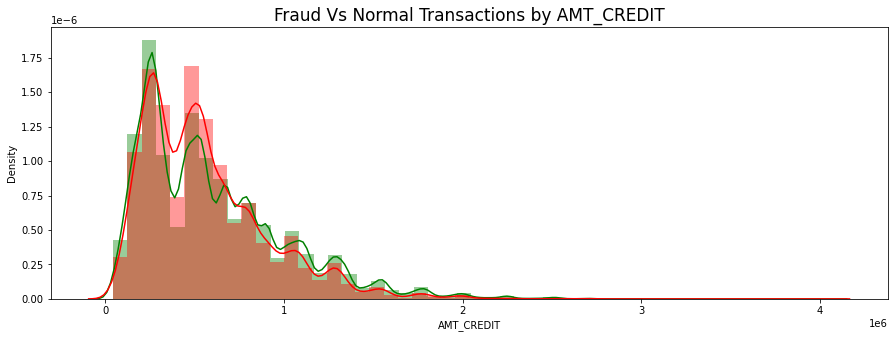

In [ ]:
#The fraud Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['TARGET'] == 0]["AMT_CREDIT"], color='green')
sns.distplot(df[df['TARGET'] == 1]["AMT_CREDIT"], color='red')
plt.title('Fraud Vs Normal Transactions by AMT_CREDIT', fontsize=17)
plt.show()

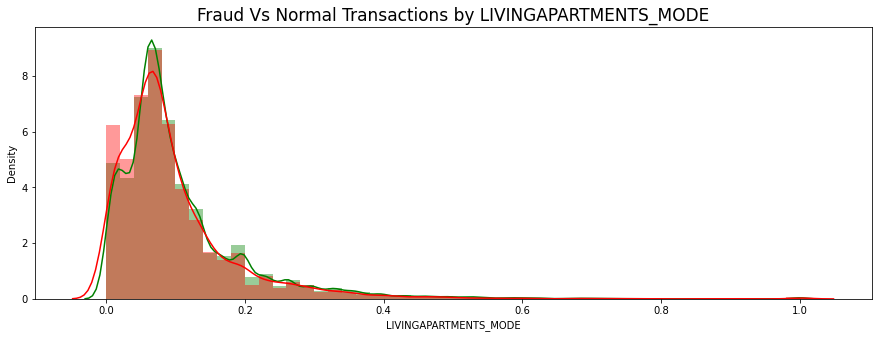

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['TARGET'] == 0]["LIVINGAPARTMENTS_MODE"], color='green')
sns.distplot(df[df['TARGET'] == 1]["LIVINGAPARTMENTS_MODE"], color='red')
plt.title('Fraud Vs Normal Transactions by LIVINGAPARTMENTS_MODE', fontsize=17)
plt.show()

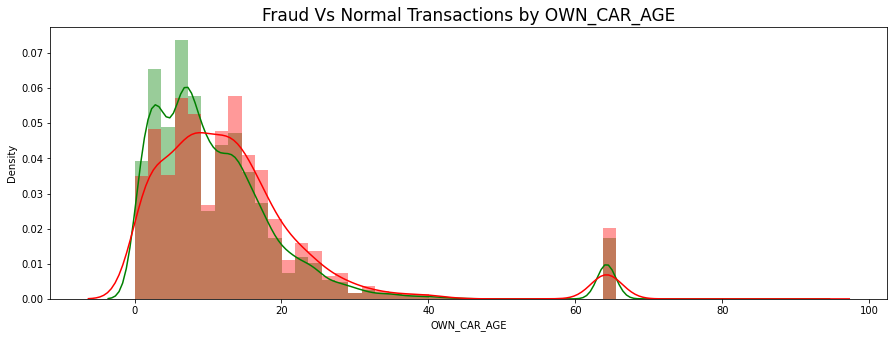

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['TARGET'] == 0]["OWN_CAR_AGE"], color='green')
sns.distplot(df[df['TARGET'] == 1]["OWN_CAR_AGE"], color='red')
plt.title('Fraud Vs Normal Transactions by OWN_CAR_AGE', fontsize=17)
plt.show()

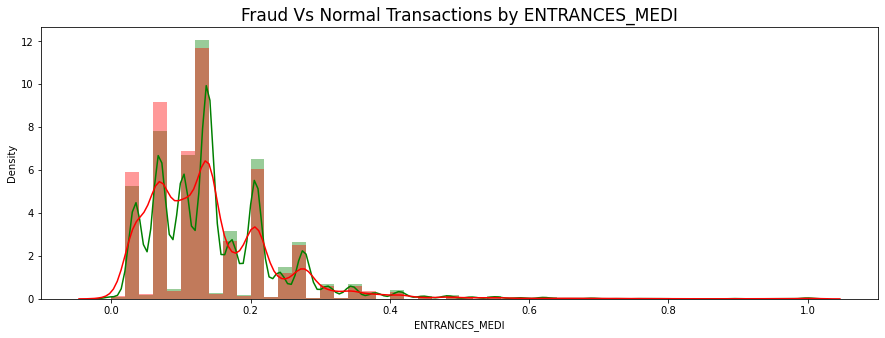

In [ ]:

plt.figure(figsize=(15,5))
sns.distplot(df[df['TARGET'] == 0]["ENTRANCES_MEDI"], color='green')
sns.distplot(df[df['TARGET'] == 1]["ENTRANCES_MEDI"], color='red')
plt.title('Fraud Vs Normal Transactions by ENTRANCES_MEDI', fontsize=17)
plt.show()


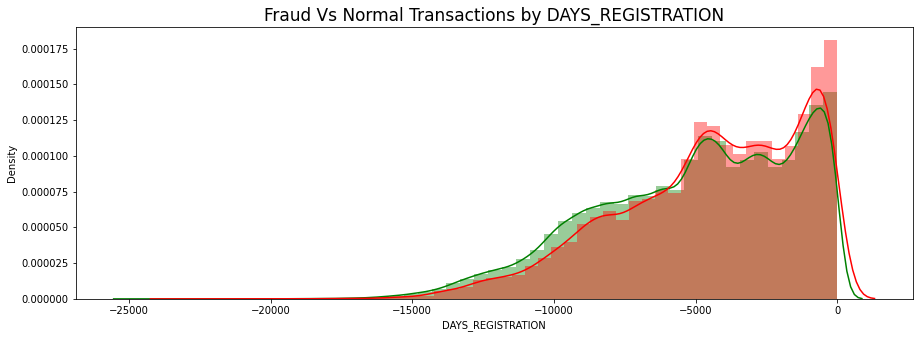

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['TARGET'] == 0]["DAYS_REGISTRATION"], color='green')
sns.distplot(df[df['TARGET'] == 1]["DAYS_REGISTRATION"], color='red')
plt.title('Fraud Vs Normal Transactions by DAYS_REGISTRATION', fontsize=17)
plt.show()


Text(0.5, 1.0, 'Visualising missing values')

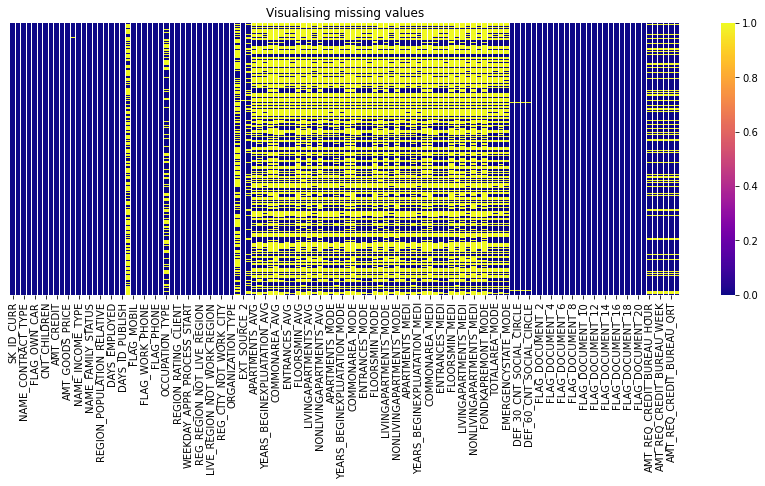

In [ ]:
# visualization null values using heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(), cmap = 'plasma', annot=False,yticklabels= False)
plt.title('Visualising missing values')

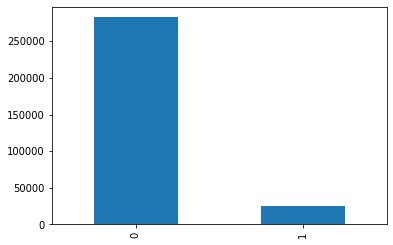

In [ ]:
#Check the fraud/Non_Fraud related records
count=df['TARGET'].value_counts()
count.plot(kind = 'bar')

## Spliting Data to Train/Test 


In [5]:
## Splitting the Dataset into Train & Test
x = df.drop('TARGET',axis=1)
y = df['TARGET']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

In [ ]:
print('Shape of X_train : ', x_train.shape)
print('Shape of Y_train : ', y_train.shape)
print('Shape of X_test : ', x_test.shape)
print('Shape of Y_test : ', y_test.shape)

Shape of X_train :  (230633, 121)
Shape of Y_train :  (230633,)
Shape of X_test :  (76878, 121)
Shape of Y_test :  (76878,)


## Encoding Categorial Values

In [6]:
x_train = pd.get_dummies(x_train, columns = ['OCCUPATION_TYPE','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE','FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'])
x_test = pd.get_dummies(x_test, columns = ['OCCUPATION_TYPE','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE','FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'])

In [7]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(x_train)
X_test= imputer.fit_transform(x_test)

## Checking Class Imbalance

Text(0.7, 0.5, '8.123%')

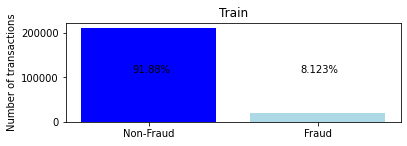

In [8]:

classes_train=y_train.value_counts()
normal_share_train=classes_train[0]/y_train.count()*100
fraud_share_train=classes_train[1]/y_train.count()*100


plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train, color=['blue','lightblue'])
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')



## Oversampling 

In [9]:
## oversampling technique for a more balanced dataset to feed our model
ros = RandomOverSampler(random_state=0)
X_train, Y_train = ros.fit_resample(X_train, y_train)

Text(0.7, 0.5, '50.0%')

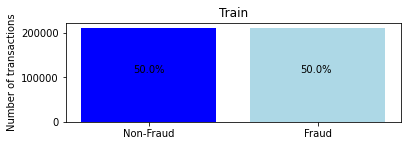

In [10]:
## Checking Class Imbalance after Sampling

classes_train=Y_train.value_counts()
normal_share_train=classes_train[0]/Y_train.count()*100
fraud_share_train=classes_train[1]/Y_train.count()*100


plt.subplot(2,1,1)
plt.bar(['Non-Fraud','Fraud'], classes_train, color=['blue','lightblue'])
plt.title('Train')
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share_train),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share_train),(0.7, 0.5), xycoords='axes fraction')


In [ ]:
X_train.shape

(423798, 245)

In [ ]:
X_test.shape

(141574, 245)

## Random Forest

In [11]:
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train,Y_train)
y_pred = random_forest.predict(X_test)

In [12]:
print('Confustion Matrix : \n\n', confusion_matrix(y_test,y_pred))
print('\n Accuracy Score : ',   accuracy_score(y_test,y_pred))
print('\n Classification Report : \n \n', classification_report(y_test,y_pred))

Confustion Matrix : 

 [[70753    34]
 [ 6045    46]]

 Accuracy Score :  0.9209266630245324

 Classification Report : 
 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     70787
           1       0.57      0.01      0.01      6091

    accuracy                           0.92     76878
   macro avg       0.75      0.50      0.49     76878
weighted avg       0.89      0.92      0.88     76878



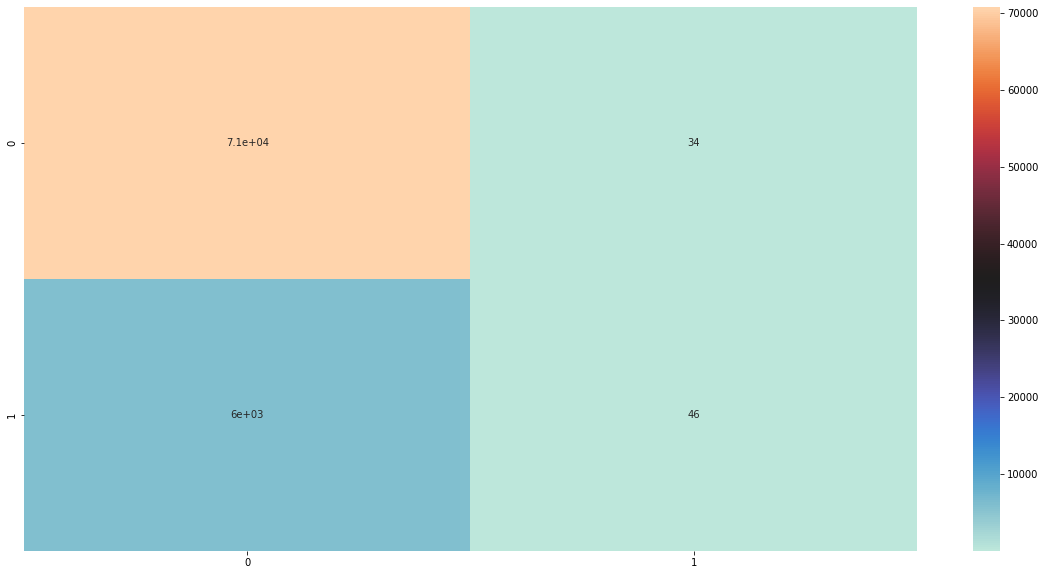

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cmap='icefire')

## Threshold

In [15]:
threshold0= 0.5
threshold1 = 0.4
threshold2 = 0.3
threshold3 = 0.6
threshold4 = 0.1
threshold5 = 0.7
threshold6 = 0.8

predicted = random_forest.predict_proba(X_test)
predicted0 = (predicted[:,1] >= threshold0).astype('int')
predicted1 = (predicted[:,1] >= threshold1).astype('int')
predicted2 = (predicted[:,1] >= threshold2).astype('int')
predicted3 = (predicted[:,1] >= threshold3).astype('int')
predicted4 = (predicted[:,1] >= threshold4).astype('int')
predicted5 = (predicted[:,1] >= threshold5).astype('int')
predicted6 = (predicted[:,1] >= threshold6).astype('int')

accuracy0 = accuracy_score(y_test, predicted0)
accuracy1 = accuracy_score(y_test, predicted1)
accuracy2 = accuracy_score(y_test, predicted2)
accuracy3 = accuracy_score(y_test, predicted3)
accuracy4 = accuracy_score(y_test, predicted4)
accuracy5 = accuracy_score(y_test, predicted5)
accuracy6 = accuracy_score(y_test, predicted6)


In [16]:
# initialize list of lists
acc= [['0.5',accuracy0],['0.4',accuracy1],['0.6',accuracy2],['0.2',accuracy3] ,['0.1',accuracy4 ],['0.7',accuracy5 ],['0.8',accuracy6 ]]
  
# Create the pandas DataFrame
thr= pd.DataFrame(acc, columns=['Threshold', 'Accuracy'])
  
# print dataframe.
thr

,Threshold,Accuracy
0,0.5,0.920784
1,0.4,0.919496
2,0.6,0.906748
3,0.2,0.920810
4,0.1,0.534496
5,0.7,0.920771
6,0.8,0.920771


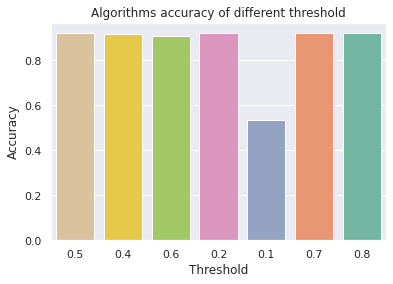

In [17]:
sns.set()
plt.title('Algorithms accuracy of different threshold')
sns.barplot(y="Accuracy", x="Threshold", data =thr, palette="Set2_r")
sns.set(rc={'figure.figsize':(15,5)})

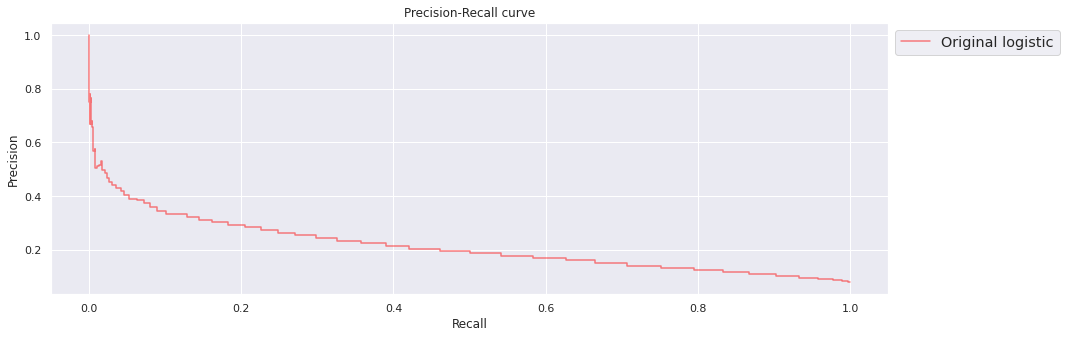

In [19]:
from sklearn.metrics import average_precision_score, precision_recall_curve
pred_prob = random_forest.predict_proba(X_test)
y_score = pred_prob[:,1]
average_precision = average_precision_score(y_test, y_score)
original_precision, original_recall, original_thresholds = precision_recall_curve(y_test, y_score)
plt.step(original_recall, original_precision, color='red', alpha=0.5,linewidth=1.5,label='Original logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')

## Features Selection

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

## taken best 10 features in the model
fs = SelectKBest(score_func=f_classif, k=10) 
model= fs.fit(X_train, Y_train)



In [23]:
#Transforming data with 10 features
X_train_2 = model.transform(X_train)
X_test_2 = model.transform(X_test)
random_forest.fit(X_train_2,Y_train)
pred_2 = random_forest.predict(X_test_2)

In [ ]:
X_test_2.shape

(141574, 10)

In [24]:
print(classification_report(y_test,pred_2))
print(accuracy_score(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     70787
           1       0.30      0.04      0.07      6091

    accuracy                           0.92     76878
   macro avg       0.61      0.52      0.51     76878
weighted avg       0.87      0.92      0.89     76878

0.9163609875386977


In [25]:
##
x_train=x_train.replace(np.nan,0.0)
x_test=x_test.replace(np.nan,0.0)

In [26]:
rf2=RandomForestClassifier()
rf2.fit(x_train,y_train)
feature_importance = rf2.feature_importances_
# importance_df = pd.DataFrame({'features': x_train.columns,
#                               'importance': feature_importance})
# importance_df.sort_values(by='importance', ascending=False, inplace=True)
# importance_df


In [27]:
feature_importance = rf2.feature_importances_
importance_df = pd.DataFrame({'features': x_train.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df

,features,importance
29,EXT_SOURCE_2,0.048931
30,EXT_SOURCE_3,0.038086
7,DAYS_BIRTH,0.033345
10,DAYS_ID_PUBLISH,0.032468
9,DAYS_REGISTRATION,0.031791
...,...,...
156,NAME_FAMILY_STATUS_Unknown,0.000000
89,FLAG_DOCUMENT_12,0.000000
144,NAME_INCOME_TYPE_Student,0.000000
127,CODE_GENDER_XNA,0.000000


In [28]:
feature_list = importance_df['features'].head(10).tolist()

In [29]:
X_train_new = x_train[feature_list]
X_test_new = x_test[feature_list]

In [30]:
rf3=RandomForestClassifier()
rf3.fit(X_train_new,y_train)
pred_new=rf3.predict(X_test_new)

In [31]:
print(classification_report(y_test,pred_new))
print(accuracy_score(y_test,pred_new))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70787
           1       0.54      0.01      0.01      6091

    accuracy                           0.92     76878
   macro avg       0.73      0.50      0.49     76878
weighted avg       0.89      0.92      0.88     76878

0.9208486172897318
